# DIABETES PROJECT

# SUMMARY

The aim of this project is to develop a system which can perform early prediction of diabetes for a patient with a higher accuracy by combining the results of different machine learning techniques.This project aims to predict diabetes via three different supervised machine learning methods including: SVM, Logistic regression, KNN,decsion tree,random forest,naive bayes. This project also aims to propose an effective technique for earlier detection of the diabetes disease using Machine learning algorithms and end to end deployment.

# IMPORT LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv(r'C:\Users\PAVITHRA\Desktop\PPPPPPP\python training\diabetes.csv')

# Exploratory Data Analysis

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.shape

(768, 9)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
df.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [11]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [12]:
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())

In [13]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

# histogram

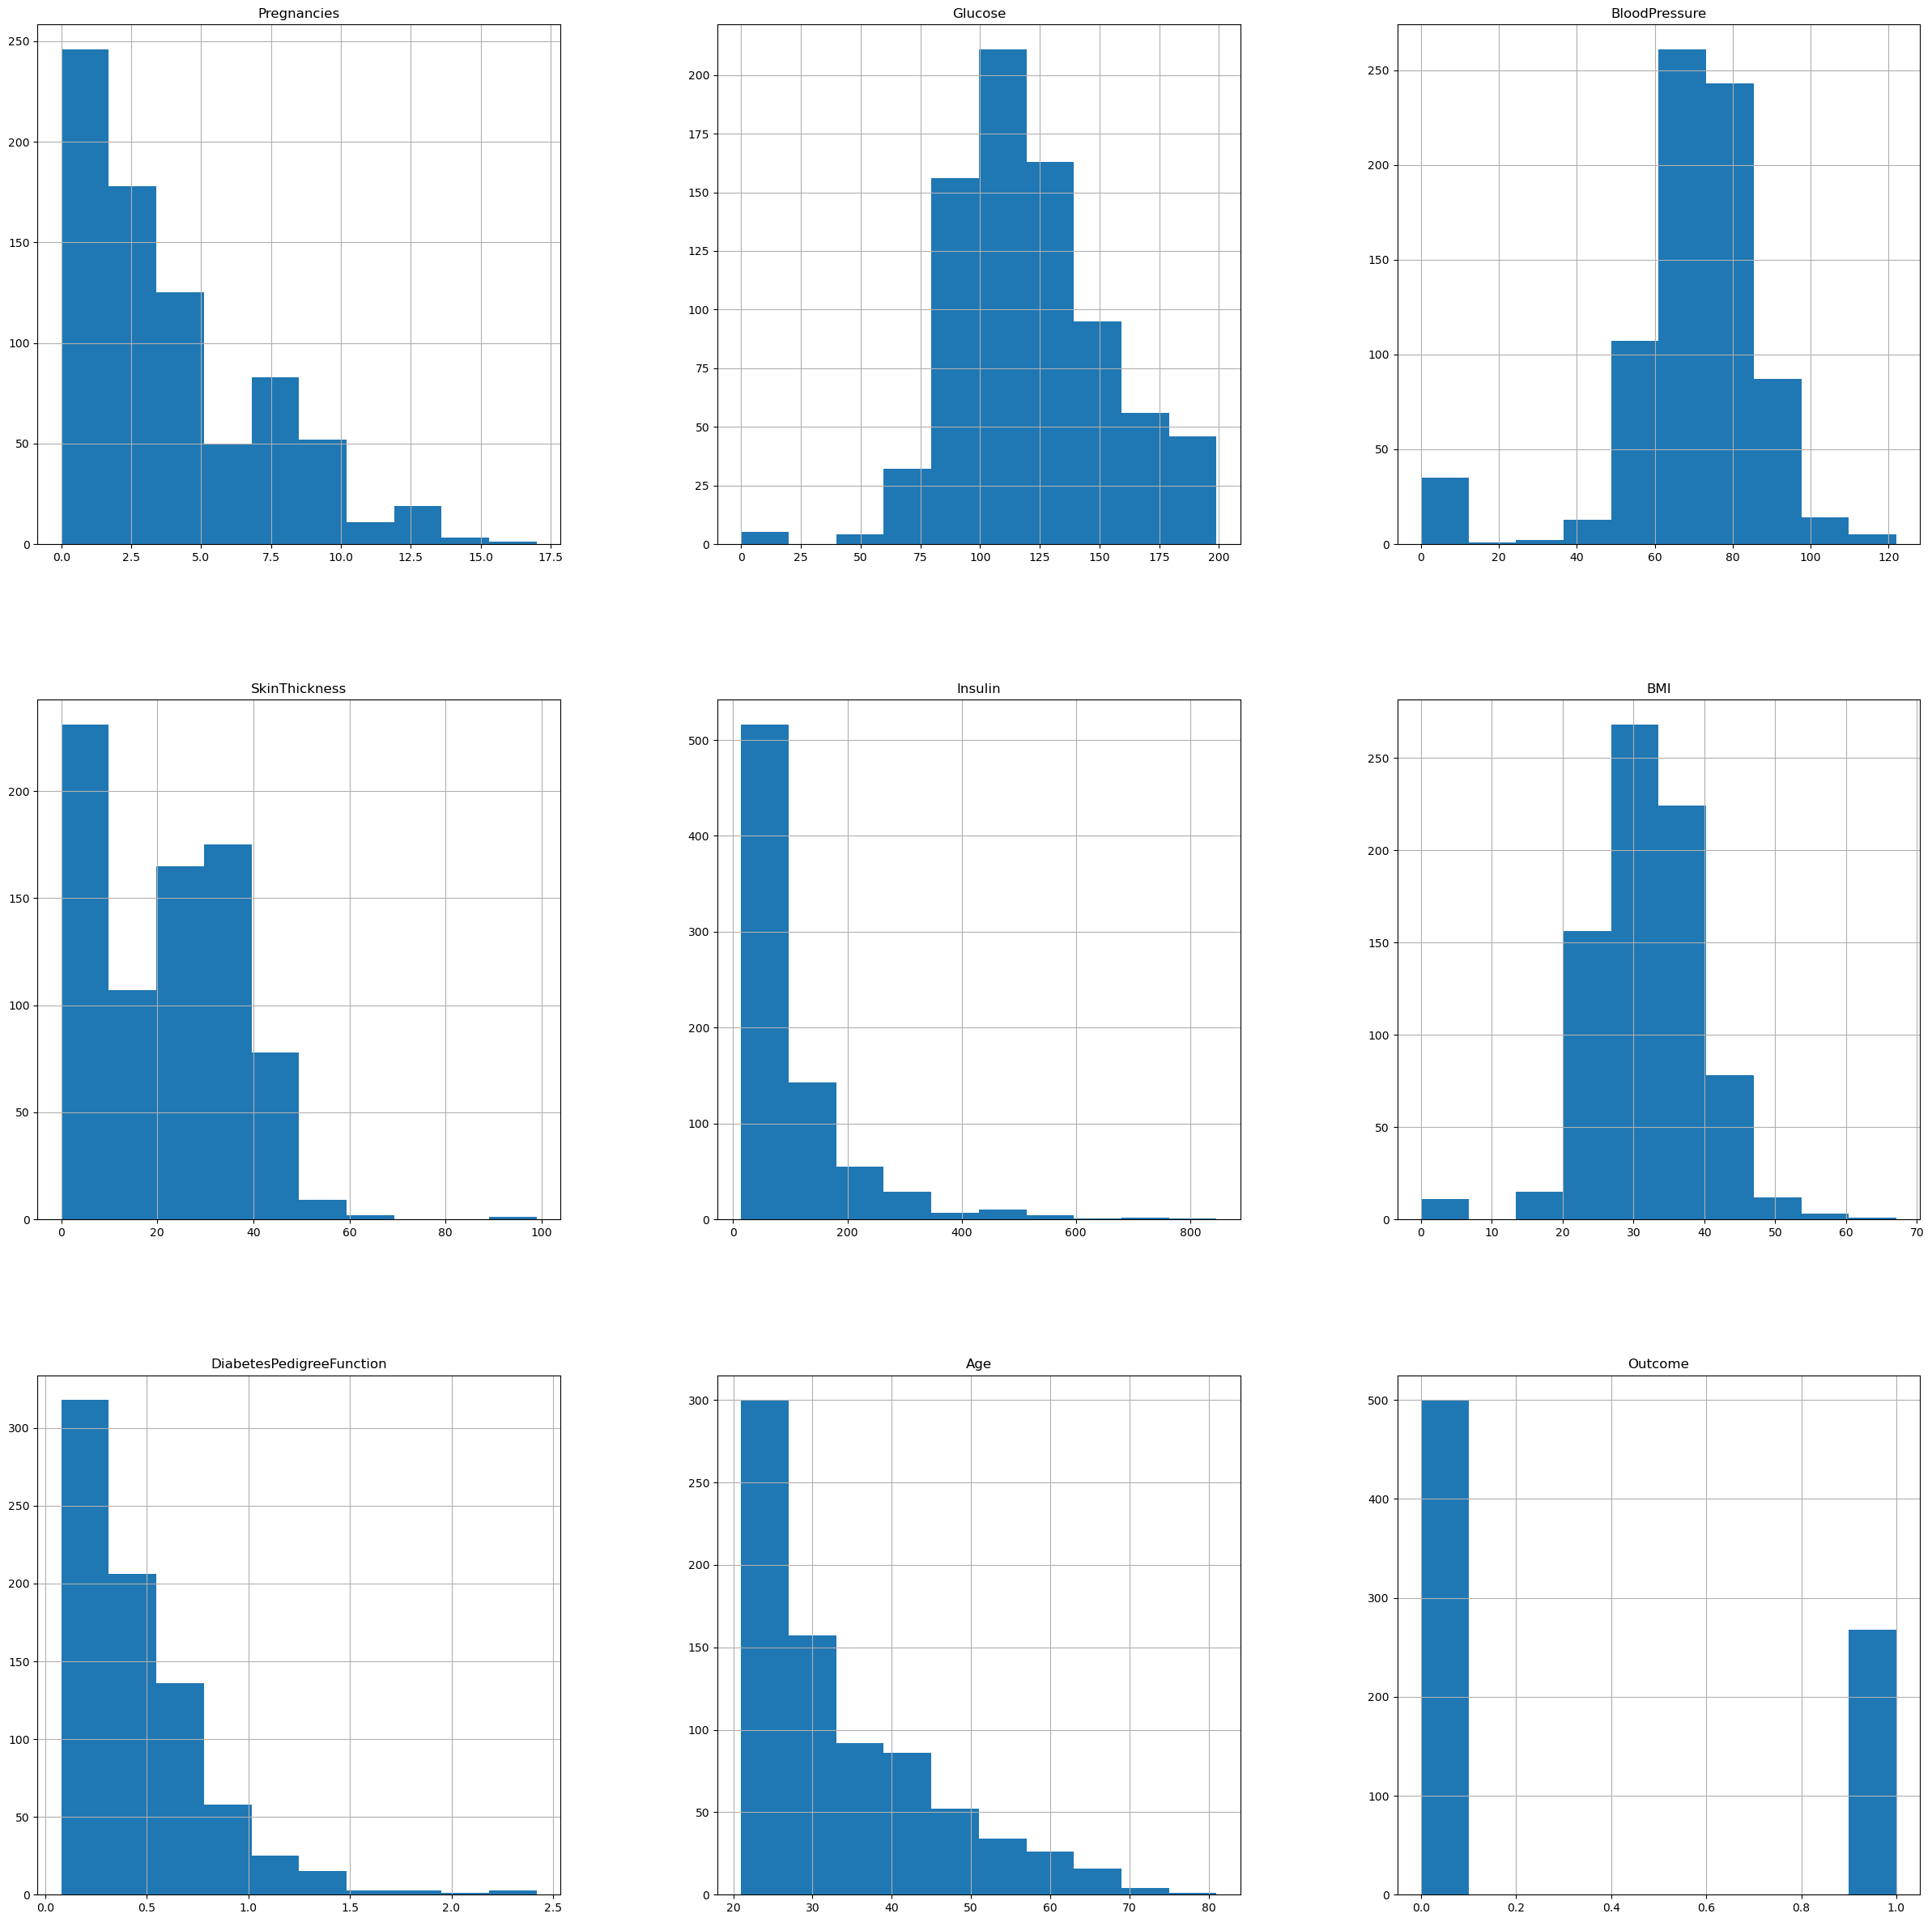

In [14]:
p=df.hist(bins=10,figsize=(30,30))
plt.show()

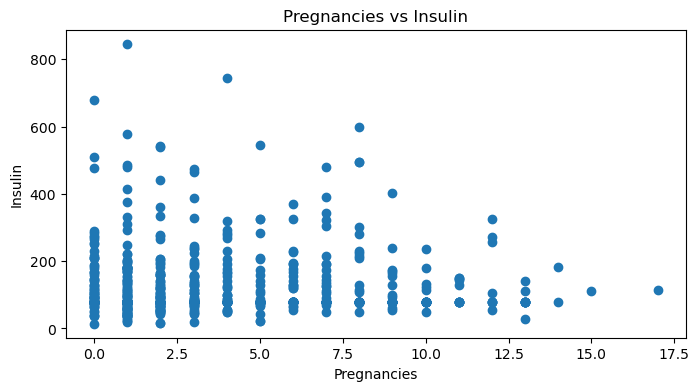

In [15]:
plt.figure(figsize = (8,4))
plt.scatter("Pregnancies", "Insulin", data = df)
plt.title("Pregnancies vs Insulin")
plt.xlabel("Pregnancies")
plt.ylabel("Insulin")
plt.show()

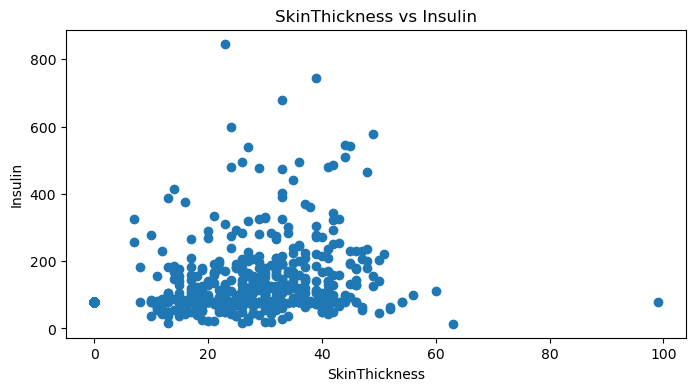

In [16]:
plt.figure(figsize = (8,4))
plt.scatter("SkinThickness", "Insulin", data = df)
plt.title("SkinThickness vs Insulin")
plt.xlabel("SkinThickness")
plt.ylabel("Insulin")
plt.show()

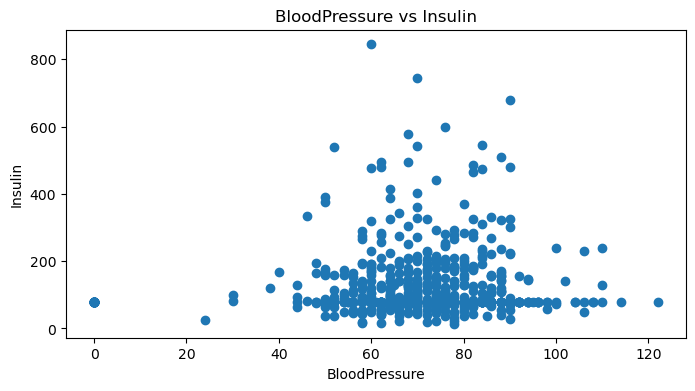

In [17]:
plt.figure(figsize = (8,4))
plt.scatter("BloodPressure", "Insulin", data = df)
plt.title("BloodPressure vs Insulin")
plt.xlabel("BloodPressure")
plt.ylabel("Insulin")
plt.show()

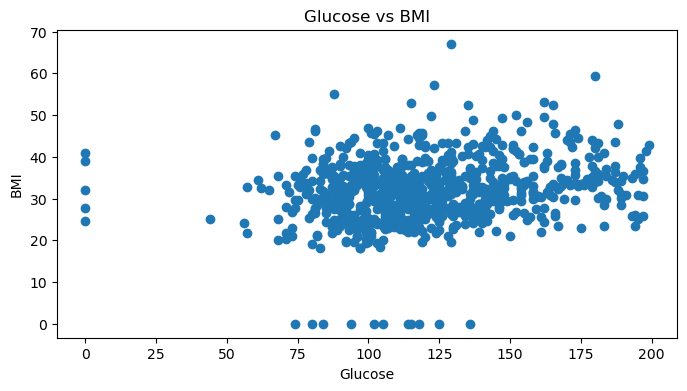

In [18]:
plt.figure(figsize = (8,4))
plt.scatter("Glucose", "BMI", data = df)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

# SCATTER  MATRIX

The scatter matrix is a valuable tool for exploring the relationships between multiple variables simultaneously. It helps to identify patterns, trends, and potential correlations between variables. This visualization is particularly useful in data analysis and exploratory data analysis (EDA) when dealing with multivariate datasets.

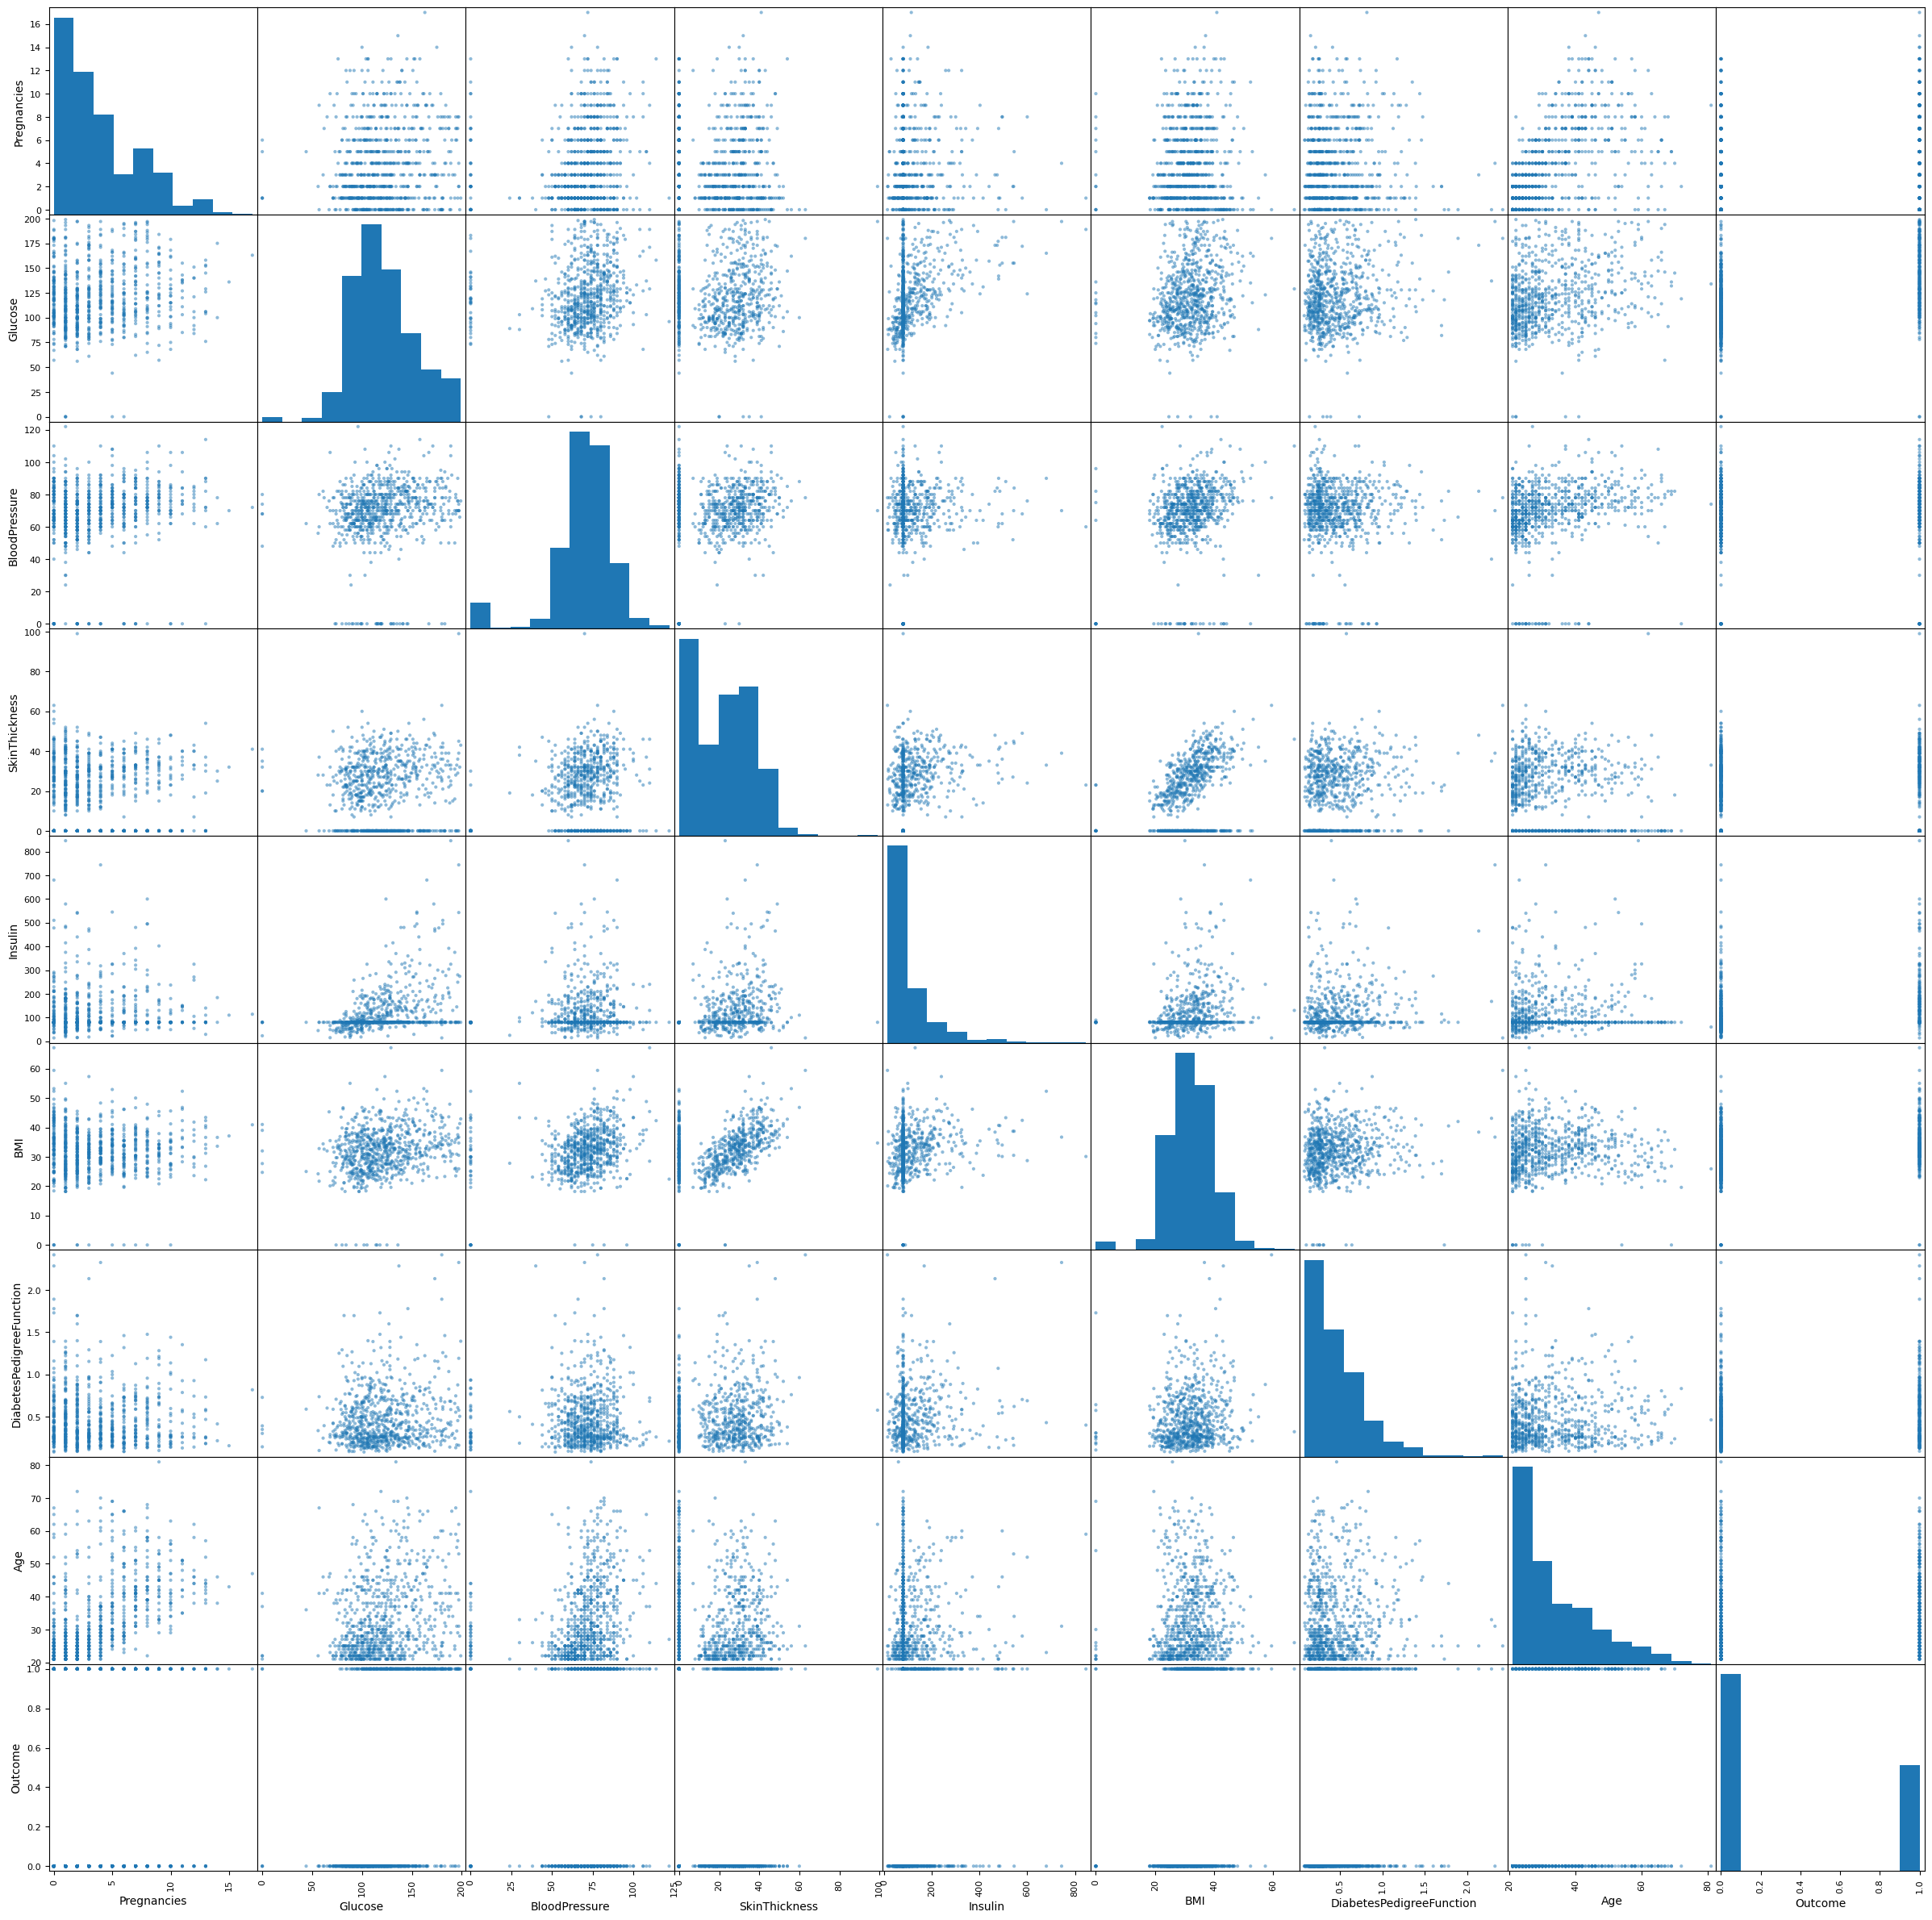

In [19]:
p=scatter_matrix(df,figsize=(30, 30))

# Plotting pair plot

Pair plots are particularly useful in exploratory data analysis (EDA) to gain insights into the data structure, identify potential outliers, and observe patterns or trends. They are commonly employed in data science and machine learning workflows to understand the relationships between features and their impact on the target variable.

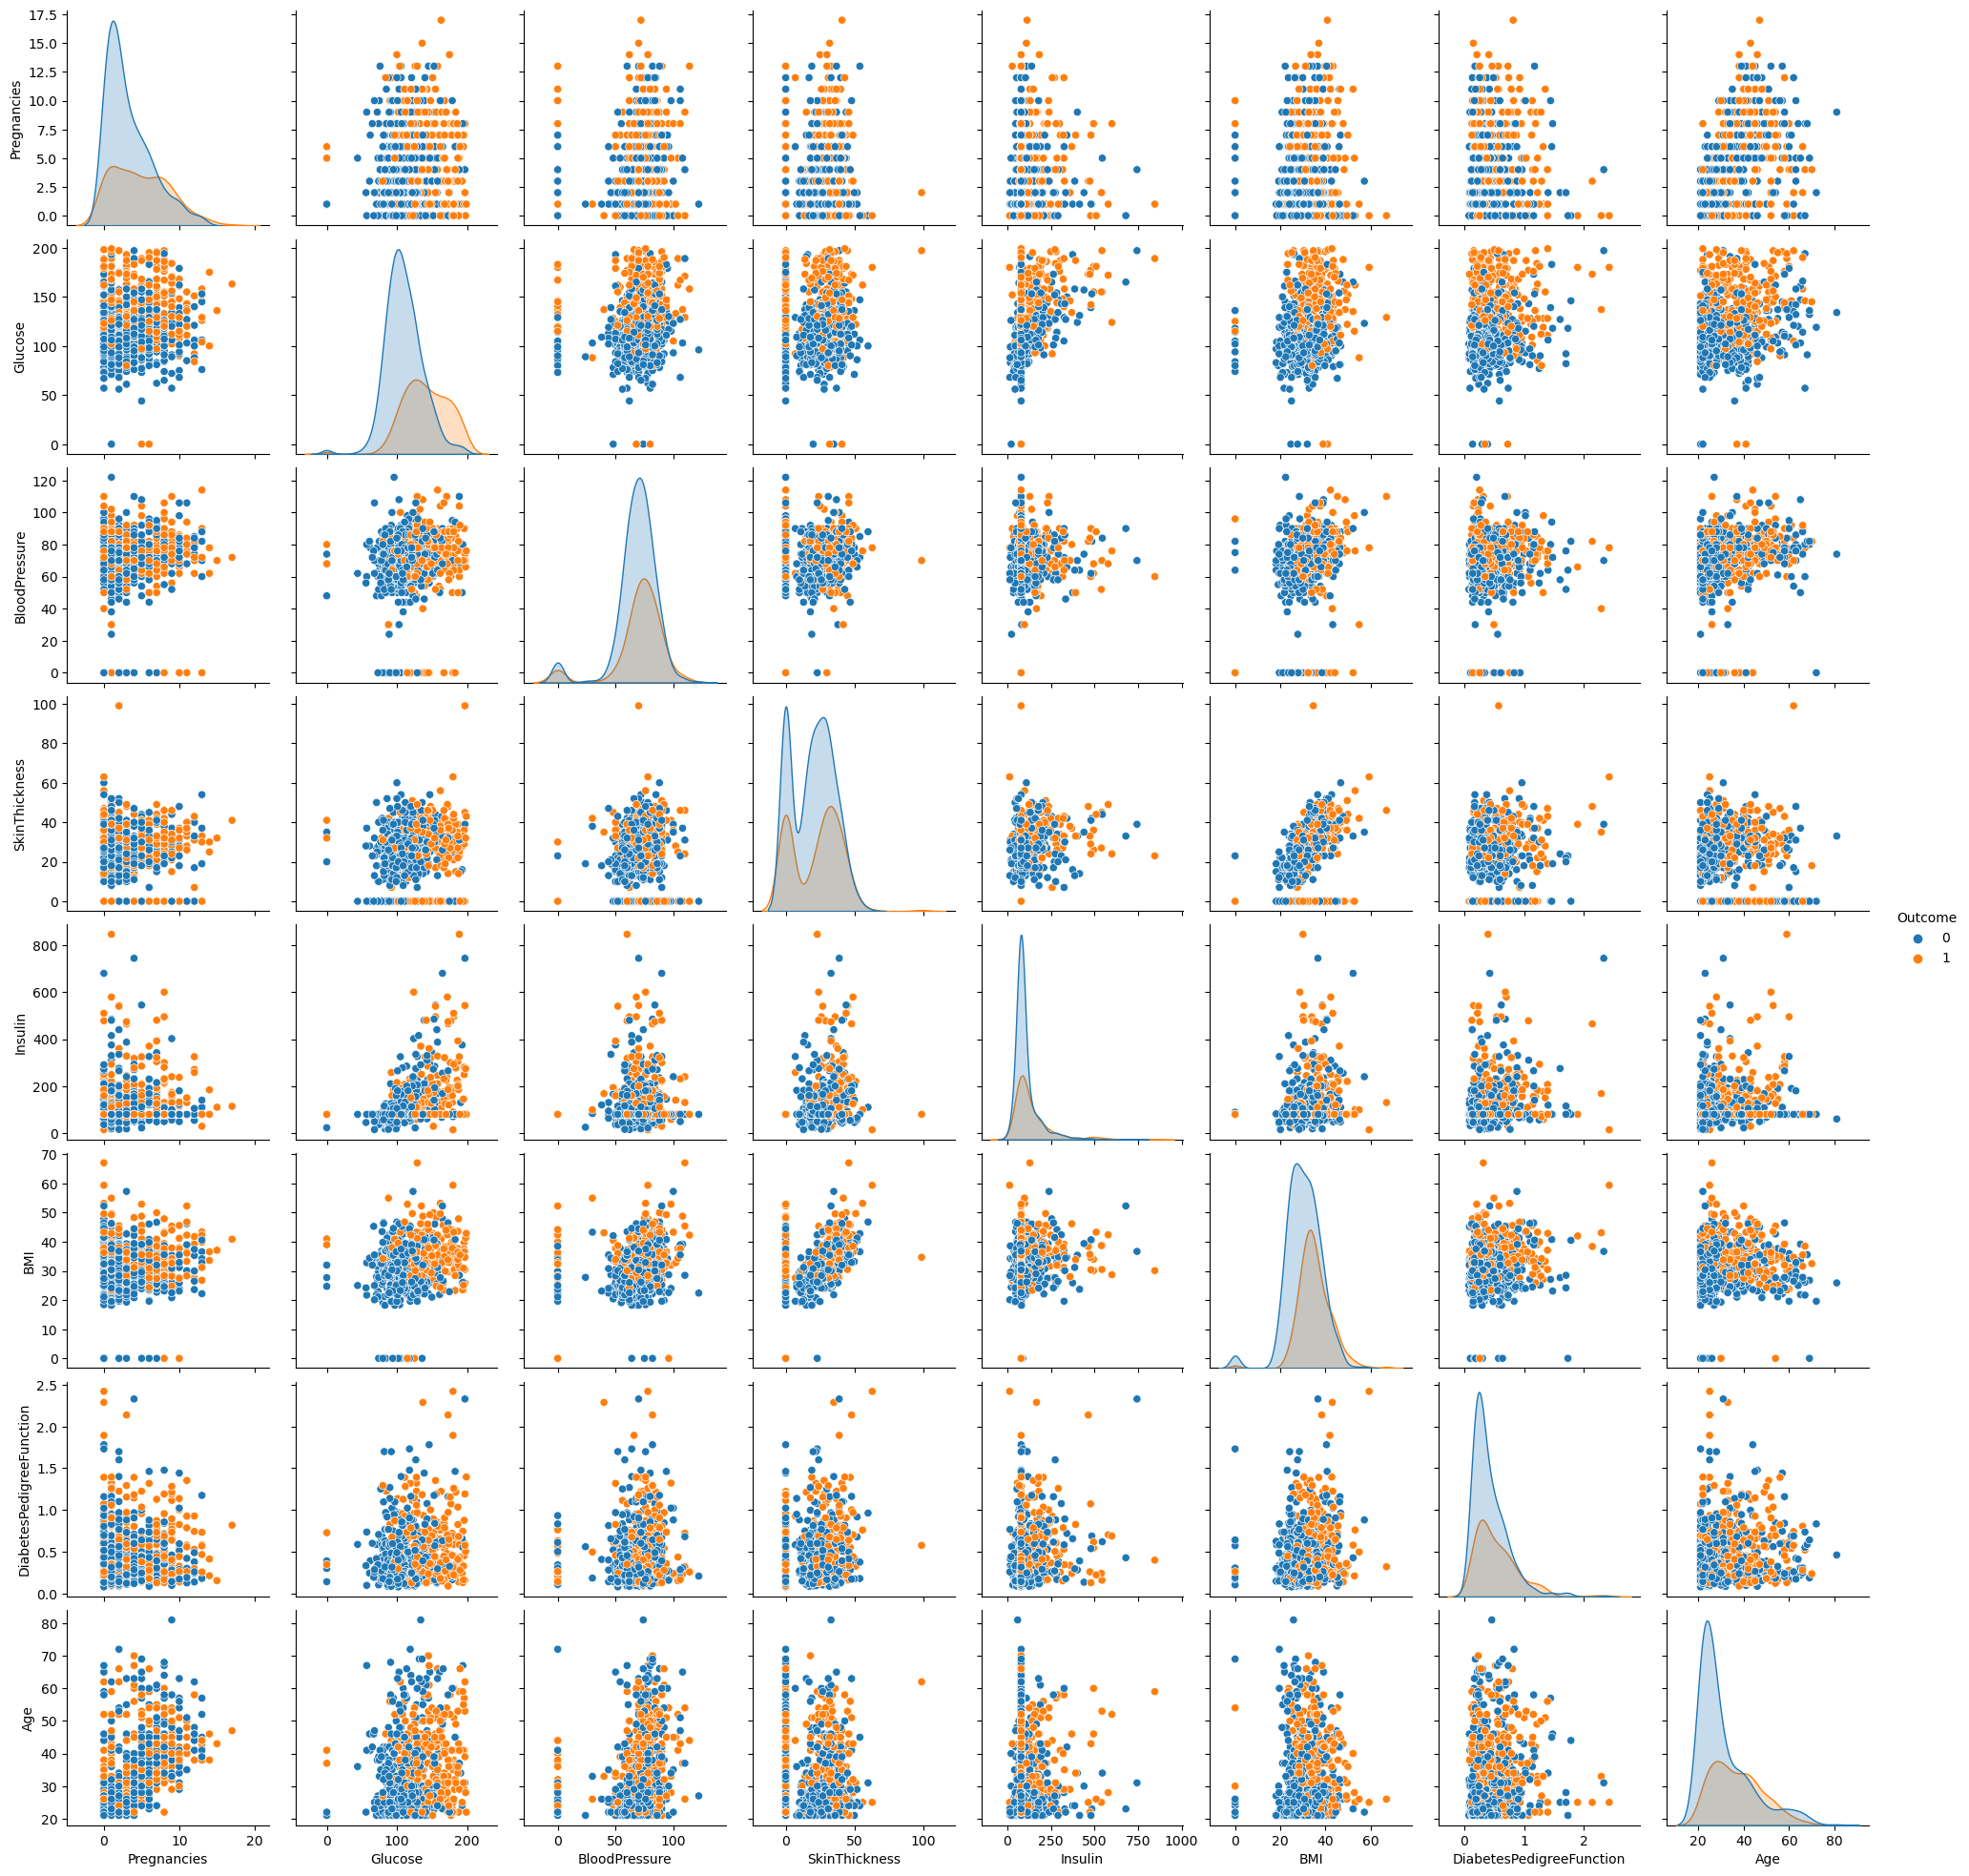

In [20]:
p=sns.pairplot(df, hue ="Outcome")

C:\Users\PAVITHRA\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


negative (0):  500
positive (0):  268


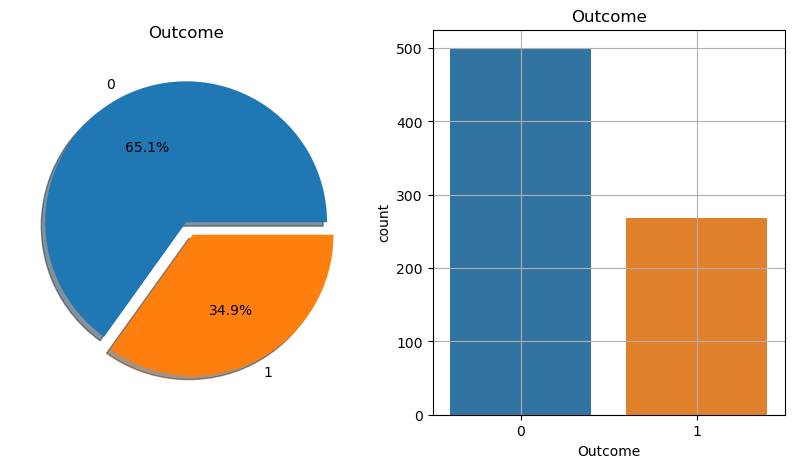

In [21]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P=df['Outcome'].value_counts()
print('negative (0): ',N)
print('positive (0): ',P)
plt.grid()
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


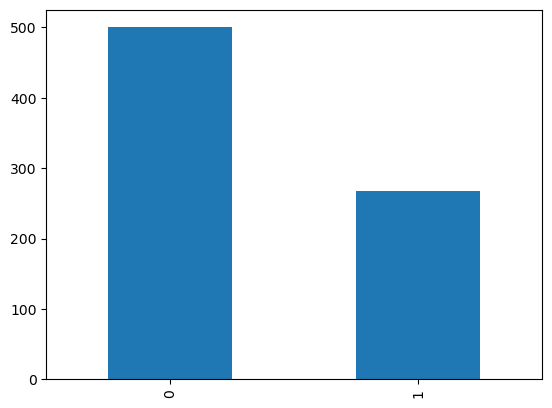

In [22]:
p=df.Outcome.value_counts().plot(kind="bar")
print(df.Outcome.value_counts())

# Correlation between all features

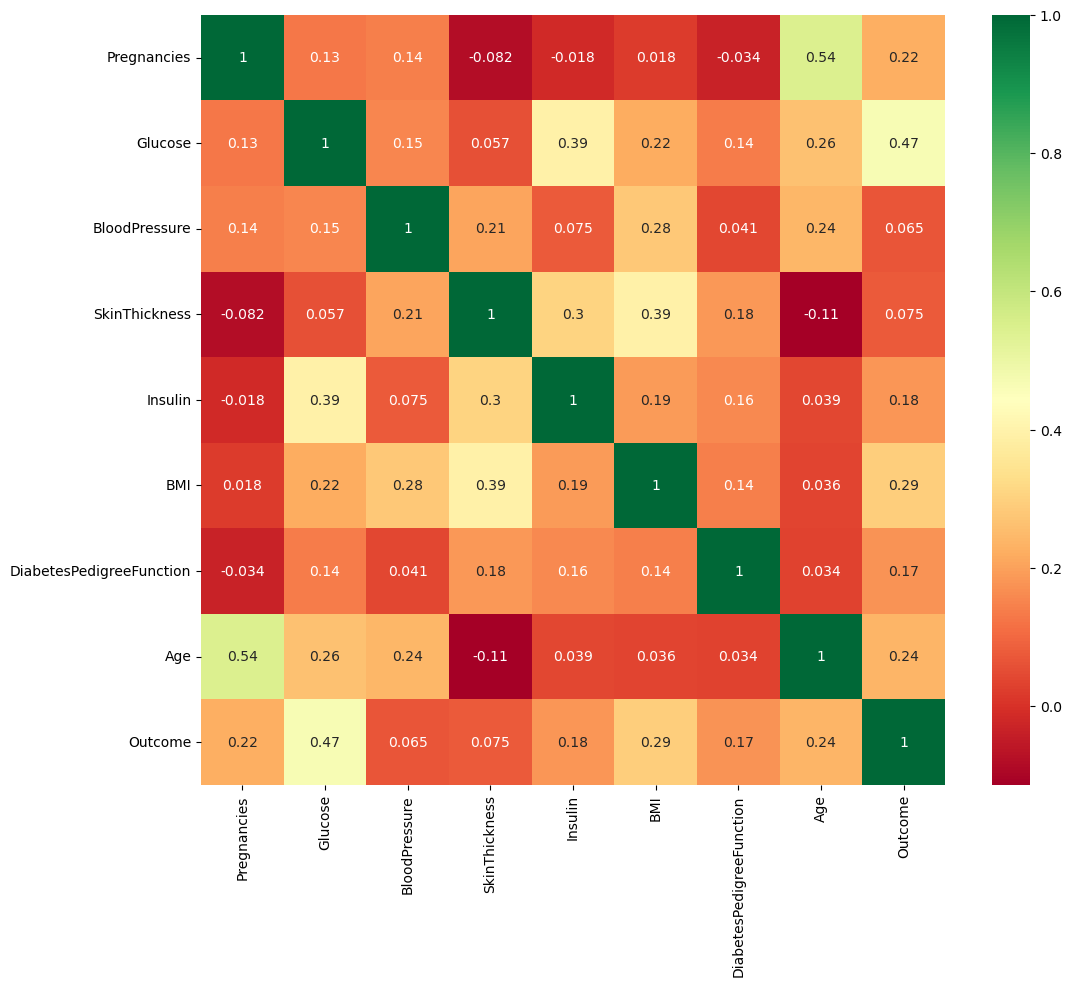

In [23]:
corrmat = df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(12,10))
p= sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

# Removing outliers

In [24]:
def remove_outlier (dataFrame):
    for column_name in dataFrame.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5*IQR
        upper_limit = Q3 + 1.5*IQR
        print(f"{column_name} >> Lower limit:  {lower_limit}  \n Upper limit: {upper_limit}")
        dataFrame = dataFrame[(dataFrame[column_name] > lower_limit)|(dataFrame[column_name] < upper_limit)]
        
    return dataFrame

In [25]:
df = remove_outlier(df)

Pregnancies >> Lower limit:  -6.5  
 Upper limit: 13.5
Glucose >> Lower limit:  37.125  
 Upper limit: 202.125
BloodPressure >> Lower limit:  35.0  
 Upper limit: 107.0
SkinThickness >> Lower limit:  -48.0  
 Upper limit: 80.0
Insulin >> Lower limit:  8.623697916666671  
 Upper limit: 198.42578125
BMI >> Lower limit:  13.35  
 Upper limit: 50.550000000000004
DiabetesPedigreeFunction >> Lower limit:  -0.32999999999999996  
 Upper limit: 1.2
Age >> Lower limit:  -1.5  
 Upper limit: 66.5
Outcome >> Lower limit:  -1.5  
 Upper limit: 2.5


In [26]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [27]:
df.shape

(768, 9)

# Support Vector Machine 

In [28]:
x= df.drop(columns= 'Outcome', axis=1)
y = df['Outcome']

In [29]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [30]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [31]:
scaler =StandardScaler()

In [32]:
scaler.fit(x)

StandardScaler()

In [33]:
standardized_data = scaler.transform(x)

In [34]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [35]:
x=standardized_data
y=df['Outcome']

In [36]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# TRAIN TEST SPLIT

In [37]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [41]:
x_train_prediction= classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [42]:
print('accuracy score of the training data :' ,training_data_accuracy)

accuracy score of the training data : 0.7866449511400652


In [43]:
# accuracy score on the testing data
x_test_prediction= classifier.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [44]:
print('accuracy score of the test data :' ,test_data_accuracy)

accuracy score of the test data : 0.7727272727272727


# K Nearest neighbour

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [46]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [47]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [48]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [49]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [50]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
88            15      136             70             32  110.000000  37.1   
467            0       97             64             36  100.000000  36.8   
550            1      116             70             28   79.799479  27.4   
147            2      106             64             35  119.000000  30.5   
481            0      123             88             37   79.799479  35.2   
..           ...      ...            ...            ...         ...   ...   
645            2      157             74             35  440.000000  39.4   
715            7      187             50             33  392.000000  33.9   
72            13      126             90              0   79.799479  43.4   
235            4      171             72              0   79.799479  43.6   
37             9      102             76             37   79.799479  32.9   

     DiabetesPedigreeFunction  Age  
88                      0.153   43  
467                     0.600   25  
550                     0.204   21  
147                     1.400   34  
481                     0.197   29  
..                        ...  ...  
645                     0.134   30  
715                     0.826   34  
72                      0.583   42  
235                     0.479   26  
37                      0.665   46  

[537 rows x 8 columns]

In [51]:
x_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
285            7      136             74             26  135.000000  26.0   
101            1      151             60              0   79.799479  26.1   
581            6      109             60             27   79.799479  25.0   
352            3       61             82             28   79.799479  34.4   
726            1      116             78             29  180.000000  36.1   
..           ...      ...            ...            ...         ...   ...   
241            4       91             70             32   88.000000  33.1   
599            1      109             38             18  120.000000  23.1   
650            1       91             54             25  100.000000  25.2   
11            10      168             74              0   79.799479  38.0   
214            9      112             82             32  175.000000  34.2   

     DiabetesPedigreeFunction  Age  
285                     0.647   51  
101                     0.179   22  
581                     0.206   27  
352                     0.243   46  
726                     0.496   25  
..                        ...  ...  
241                     0.446   22  
599                     0.407   26  
650                     0.234   23  
11                      0.537   34  
214                     0.260   36  

[231 rows x 8 columns]

In [52]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 537, dtype: int64

In [53]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
241    0
599    0
650    0
11     1
214    1
Name: Outcome, Length: 231, dtype: int64

In [54]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
knn_pred=knn.predict(x_test)

C:\Users\PAVITHRA\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
knn_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

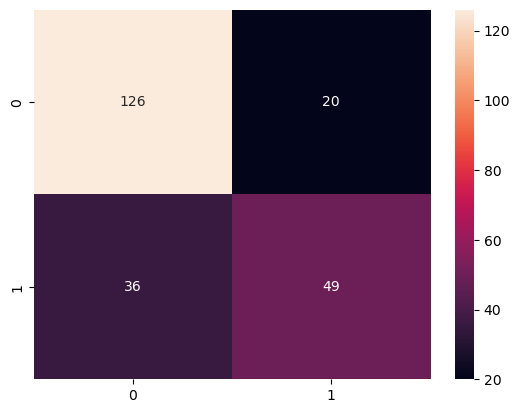

In [57]:
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True,fmt="d")
cm=confusion_matrix(y_test,knn_pred)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print('TN - true negative {}'.format(cm[0,0]))
print('FP - false positive {}'.format(cm[0,1]))
print('FN - false negative {}'.format(cm[1,0]))
print('TP - true positive {}'.format(cm[1,1]))
print('accuracy rate of KNeighbors: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('misclassification rate of KNeighbors : {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - true negative 126
FP - false positive 20
FN - false negative 36
TP - true positive 49
accuracy rate of KNeighbors: 75.75757575757575
misclassification rate of KNeighbors : 24.242424242424242


In [59]:
print("classification report of KNeighborsClassifier: \n" ,classification_report(y_test,knn_pred,digits=4))

classification report of KNeighborsClassifier: 
               precision    recall  f1-score   support

           0     0.7778    0.8630    0.8182       146
           1     0.7101    0.5765    0.6364        85

    accuracy                         0.7576       231
   macro avg     0.7440    0.7197    0.7273       231
weighted avg     0.7529    0.7576    0.7513       231



In [60]:
print("train accuracy of KNeighbors classifier",knn.score(x_train,y_train)*100)
print("accuracy (test) score of KNeighbors classifier",knn.score(x_test,y_test)*100)
print("accuracy score of KNeighbors classifier",accuracy_score(y_test,knn_pred)*100)

train accuracy of KNeighbors classifier 80.26070763500931
accuracy (test) score of KNeighbors classifier 75.75757575757575
accuracy score of KNeighbors classifier 75.75757575757575


C:\Users\PAVITHRA\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\PAVITHRA\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [61]:
auc= roc_auc_score(y_test,knn_pred)
print('roc_auc_score of KNN:',auc)

roc_auc_score of KNN: 0.7197421434327156


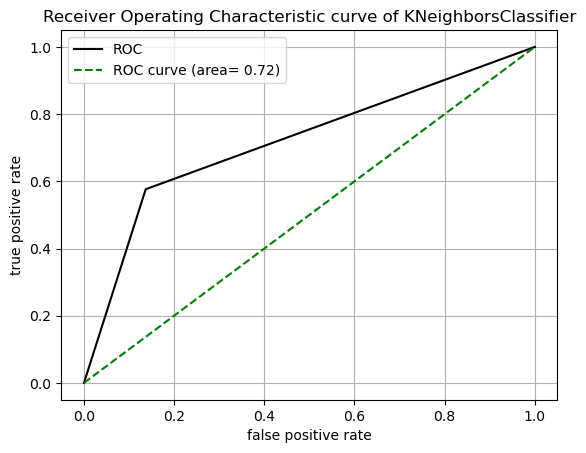

In [62]:
fpr,tpr,thresholds=roc_curve(y_test,knn_pred)
plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1],[0,1], color='green',linestyle='--',label='ROC curve (area= %0.2f)' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic curve of KNeighborsClassifier")
plt.legend()
plt.grid()
plt.show()

# Logistic Regression

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [65]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [66]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [67]:
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.8, random_state = 42)

In [68]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
60             2       84              0              0   79.799479   0.0   
618            9      112             82             24   79.799479  28.2   
346            1      139             46             19   83.000000  28.7   
294            0      161             50              0   79.799479  21.9   
231            6      134             80             37  370.000000  46.2   
..           ...      ...            ...            ...         ...   ...   
71             5      139             64             35  140.000000  28.6   
106            1       96            122              0   79.799479  22.4   
270           10      101             86             37   79.799479  45.6   
435            0      141              0              0   79.799479  42.4   
102            0      125             96              0   79.799479  22.5   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  
..                        ...  ...  
71                      0.411   26  
106                     0.207   27  
270                     1.136   38  
435                     0.205   29  
102                     0.262   21  

[614 rows x 8 columns]

In [69]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [70]:
x_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
668            6       98             58             33  190.000000  34.0   
324            2      112             75             32   79.799479  35.7   
624            2      108             64              0   79.799479  30.8   
690            8      107             80              0   79.799479  24.6   
473            7      136             90              0   79.799479  29.9   
..           ...      ...            ...            ...         ...   ...   
355            9      165             88              0   79.799479  30.4   
534            1       77             56             30   56.000000  33.3   
344            8       95             72              0   79.799479  36.8   
296            2      146             70             38  360.000000  28.0   
462            8       74             70             40   49.000000  35.3   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  
624                     0.158   21  
690                     0.856   34  
473                     0.210   50  
..                        ...  ...  
355                     0.302   49  
534                     1.251   24  
344                     0.485   57  
296                     0.337   29  
462                     0.705   39  

[154 rows x 8 columns]

In [71]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [72]:
lr_model=LogisticRegression()

In [73]:
lr_model.fit(x_train, y_train)

LogisticRegression()

In [74]:
lr_model.fit(x_test, y_test)

LogisticRegression()

In [75]:
y_pred= lr_model.predict(x_test)

In [76]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [77]:
output=pd.DataFrame({'Actual values': y_test,'Predicted values': y_pred})

In [78]:
output

Actual values  Predicted values
668              0                 0
324              0                 0
624              0                 0
690              0                 1
473              0                 0
..             ...               ...
355              1                 1
534              0                 0
344              0                 0
296              1                 0
462              0                 0

[154 rows x 2 columns]

# Confusion matrix of Logistic regression

In [79]:
cm = confusion_matrix(y_test,y_pred)

In [80]:
cm

array([[89, 10],
       [16, 39]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

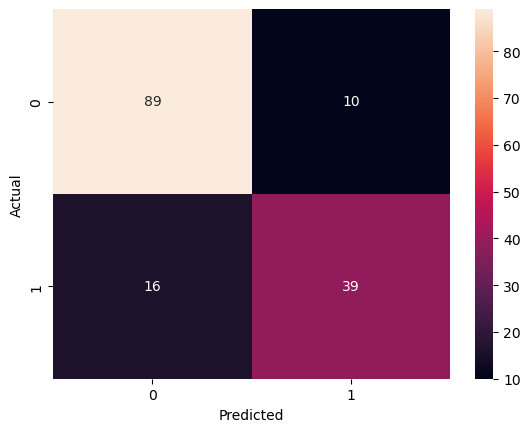

In [81]:
sns.heatmap(cm, annot = True,fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [82]:
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]

In [83]:
TN,FP,FN,TP

(89, 10, 16, 39)

In [84]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print('TN - true negative {}'.format(cm[0,0]))
print('FP - false positive {}'.format(cm[0,1]))
print('FN - false negative {}'.format(cm[1,0]))
print('TP - true positive {}'.format(cm[1,1]))

TN - true negative 89
FP - false positive 10
FN - false negative 16
TP - true positive 39


# PRECISION

In [85]:
precision=TP/(TP+FP)
precision

0.7959183673469388

In [86]:
precision_score = TP/float(TP+FP)*100
print('precision score: {0:0.4f}'.format(precision_score))

precision score: 79.5918


In [87]:
from sklearn.metrics import precision_score
print("precision score is:",precision_score(y_test,y_pred)*100)
print("micro average precision score is:",precision_score(y_test,y_pred,average='micro')*100)
print("macro average precision score is:",precision_score(y_test,y_pred,average='macro')*100)
print("weighted average precision score is :",precision_score(y_test,y_pred,average='weighted')*100)
print("precision score on non weighted score is :",precision_score(y_test,y_pred,average=None)*100)

precision score is: 79.59183673469387
micro average precision score is: 83.11688311688312
macro average precision score is: 82.17687074829931
weighted average precision score is : 82.91545189504373
precision score on non weighted score is : [84.76190476 79.59183673]


# RECALL(TRUE POSITIVE RATE)

In [88]:
recall_score =TP/float(TP+FN)*100
print("recall_score",recall_score)

recall_score 70.9090909090909


In [89]:
TP,FN

(39, 16)

In [90]:
from sklearn.metrics import recall_score
print('recall or sensitivity _score:',recall_score(y_test,y_pred)*100)

recall or sensitivity _score: 70.9090909090909


In [91]:
print("micro average recall score is:",recall_score(y_test,y_pred,average='micro')*100)
print("macro average recall score is:",recall_score(y_test,y_pred,average='macro')*100)
print("weighted average recall score is :",recall_score(y_test,y_pred,average='weighted')*100)
print("recall core on non weighted score is :",recall_score(y_test,y_pred,average=None)*100)

micro average recall score is: 83.11688311688312
macro average recall score is: 80.40404040404042
weighted average recall score is : 83.11688311688312
recall core on non weighted score is : [89.8989899  70.90909091]


# FALSE POSITIVE RATE

In [92]:
FPR=FP/float(FP+TN)*100
print('false positive rate :{0:0.4f}'.format(FPR))

false positive rate :10.1010


In [93]:
FP,TN

(10, 89)

In [94]:
10/(10+89)

0.10101010101010101

# SPECIFICITY

In [95]:
specificity=TN/(TN+FP)*100
print('specificity :{0:0.4f}'.format(specificity))

specificity :89.8990


# F1 SCORE

In [96]:
from sklearn.metrics import f1_score
print('f1_score of macro:',f1_score(y_test,y_pred)*100)

f1_score of macro: 75.0


In [97]:
print("micro average f1_score is:",f1_score(y_test,y_pred,average='micro')*100)
print("macro average f1_score is:",f1_score(y_test,y_pred,average='macro')*100)
print("weighted average f1_score is :",f1_score(y_test,y_pred,average='weighted')*100)
print("f1_score on non weighted score is :",f1_score(y_test,y_pred,average=None)*100)

micro average f1_score is: 83.11688311688312
macro average f1_score is: 81.12745098039215
weighted average f1_score is : 82.87815126050421
f1_score on non weighted score is : [87.25490196 75.        ]


# classification report of logistic regression

In [98]:
from sklearn.metrics import classification_report
print("classification report of logistic regression: \n" ,classification_report(y_test,y_pred,digits=4))

classification report of logistic regression: 
               precision    recall  f1-score   support

           0     0.8476    0.8990    0.8725        99
           1     0.7959    0.7091    0.7500        55

    accuracy                         0.8312       154
   macro avg     0.8218    0.8040    0.8113       154
weighted avg     0.8292    0.8312    0.8288       154



# ROC and AUC curve

ROC curve is one of the important evaluating metrics used to check the performance of classification model.it is also called relative operating characteristics curve.It is a  comparison of two main characters(TPR and FPR).

Receiving Operating Characteristic curve shows us how good the model can be distinguished

In [99]:
auc=roc_auc_score(y_test,y_pred)
print("ROC AND AUC SCORE OF LOGISTIC REGRESSION",auc)

ROC AND AUC SCORE OF LOGISTIC REGRESSION 0.804040404040404


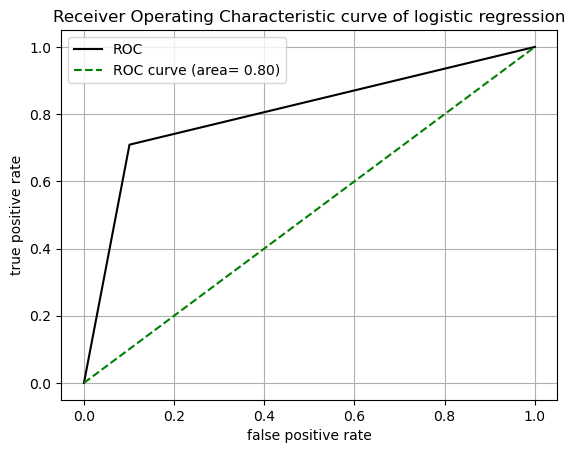

In [100]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1],[0,1], color='green',linestyle='--',label='ROC curve (area= %0.2f)' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic curve of logistic regression")
plt.legend()
plt.grid()
plt.show()

# Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [103]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [104]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [105]:
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size = 0.2,random_state=1)

In [106]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
717           10       94             72             18   79.799479  23.1   
706           10      115              0              0   79.799479   0.0   
505           10       75             82              0   79.799479  33.3   
624            2      108             64              0   79.799479  30.8   
231            6      134             80             37  370.000000  46.2   
..           ...      ...            ...            ...         ...   ...   
645            2      157             74             35  440.000000  39.4   
715            7      187             50             33  392.000000  33.9   
72            13      126             90              0   79.799479  43.4   
235            4      171             72              0   79.799479  43.6   
37             9      102             76             37   79.799479  32.9   

     DiabetesPedigreeFunction  Age  
717                     0.595   56  
706                     0.261   30  
505                     0.263   38  
624                     0.158   21  
231                     0.238   46  
..                        ...  ...  
645                     0.134   30  
715                     0.826   34  
72                      0.583   42  
235                     0.479   26  
37                      0.665   46  

[153 rows x 8 columns]

In [107]:
x_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
285            7      136             74             26  135.000000  26.0   
101            1      151             60              0   79.799479  26.1   
581            6      109             60             27   79.799479  25.0   
352            3       61             82             28   79.799479  34.4   
726            1      116             78             29  180.000000  36.1   
..           ...      ...            ...            ...         ...   ...   
450            1       82             64             13   95.000000  21.2   
137            0       93             60             25   92.000000  28.7   
536            0      105             90              0   79.799479  29.6   
212            7      179             95             31   79.799479  34.2   
740           11      120             80             37  150.000000  42.3   

     DiabetesPedigreeFunction  Age  
285                     0.647   51  
101                     0.179   22  
581                     0.206   27  
352                     0.243   46  
726                     0.496   25  
..                        ...  ...  
450                     0.415   23  
137                     0.532   22  
536                     0.197   46  
212                     0.164   60  
740                     0.785   48  

[615 rows x 8 columns]

In [108]:
y_train

717    0
706    1
505    0
624    0
231    1
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 153, dtype: int64

In [109]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
450    0
137    0
536    0
212    0
740    1
Name: Outcome, Length: 615, dtype: int64

In [110]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [111]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [112]:
dt_pred=clf.predict(x_test)

In [113]:
dt_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

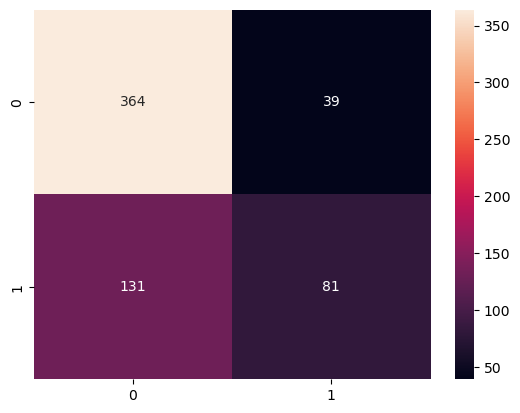

In [114]:
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True,fmt="d")
cm=confusion_matrix(y_test,dt_pred)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print('TN - true negative {}'.format(cm[0,0]))
print('FP - false positive {}'.format(cm[0,1]))
print('FN - false negative {}'.format(cm[1,0]))
print('TP - true positive {}'.format(cm[1,1]))
print('accuracy rate of decision tree: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('misclassification rate of decision tree : {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

TN - true negative 364
FP - false positive 39
FN - false negative 131
TP - true positive 81
accuracy rate of decision tree: 0.7235772357723578
misclassification rate of decision tree : 0.2764227642276423


In [116]:
print("classification report of decision tree: \n" ,classification_report(y_test,dt_pred,digits=4))

classification report of decision tree: 
               precision    recall  f1-score   support

           0     0.7354    0.9032    0.8107       403
           1     0.6750    0.3821    0.4880       212

    accuracy                         0.7236       615
   macro avg     0.7052    0.6427    0.6493       615
weighted avg     0.7145    0.7236    0.6994       615



In [117]:
print("train accuracy of decision tree",dt.score(x_train,y_train)*100)
print("accuracy (test) score of decision tree",dt.score(x_test,y_test)*100)
print("accuracy score of decision tree",accuracy_score(y_test,dt_pred)*100)

train accuracy of decision tree 96.07843137254902
accuracy (test) score of decision tree 95.1219512195122
accuracy score of decision tree 72.35772357723577


In [118]:
auc= roc_auc_score(y_test,dt_pred)
print('roc_auc_score of RF:',auc)

roc_auc_score of RF: 0.6426506390748631


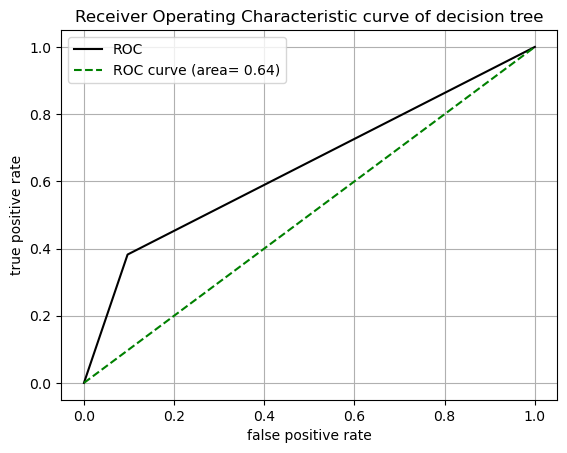

In [119]:
fpr,tpr,thresholds=roc_curve(y_test,dt_pred)
plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1],[0,1], color='green',linestyle='--',label='ROC curve (area= %0.2f)' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic curve of decision tree")
plt.legend()
plt.grid()
plt.show()

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=10)
rf_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [121]:
rf_model.fit(x_test,y_test)

RandomForestClassifier(random_state=10)

In [122]:
x = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

In [123]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6      148             72             35   79.799479  33.6   
1              1       85             66             29   79.799479  26.6   
2              8      183             64              0   79.799479  23.3   
3              1       89             66             23   94.000000  28.1   
4              0      137             40             35  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10      101             76             48  180.000000  32.9   
764            2      122             70             27   79.799479  36.8   
765            5      121             72             23  112.000000  26.2   
766            1      126             60              0   79.799479  30.1   
767            1       93             70             31   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [124]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [125]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [126]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
491            2       89             90             30   79.799479  33.5   
69             4      146             85             27  100.000000  28.9   
667           10      111             70             27   79.799479  27.5   
566            1       99             72             30   18.000000  38.6   
97             1       71             48             18   76.000000  20.4   
..           ...      ...            ...            ...         ...   ...   
369            1      133            102             28  140.000000  32.8   
320            4      129             60             12  231.000000  27.5   
527            3      116             74             15  105.000000  26.3   
125            1       88             30             42   99.000000  55.0   
265            5       96             74             18   67.000000  33.6   

     DiabetesPedigreeFunction  Age  
491                     0.292   42  
69                      0.189   27  
667                     0.141   40  
566                     0.412   21  
97                      0.323   22  
..                        ...  ...  
369                     0.234   45  
320                     0.527   31  
527                     0.107   24  
125                     0.496   26  
265                     0.997   43  

[537 rows x 8 columns]

In [127]:
x_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
568            4      154             72             29  126.000000  31.3   
620            2      112             86             42  160.000000  38.4   
456            1      135             54              0   79.799479  26.7   
197            3      107             62             13   48.000000  22.9   
714            3      102             74              0   79.799479  29.5   
..           ...      ...            ...            ...         ...   ...   
345            8      126             88             36  108.000000  38.5   
408            8      197             74              0   79.799479  25.9   
304            3      150             76              0   79.799479  21.0   
686            3      130             64              0   79.799479  23.1   
202            0      108             68             20   79.799479  27.3   

     DiabetesPedigreeFunction  Age  
568                     0.338   37  
620                     0.246   28  
456                     0.687   62  
197                     0.678   23  
714                     0.121   32  
..                        ...  ...  
345                     0.349   49  
408                     1.191   39  
304                     0.207   37  
686                     0.314   22  
202                     0.787   32  

[231 rows x 8 columns]

In [128]:
y_train

491    0
69     0
667    1
566    0
97     0
      ..
369    1
320    0
527    0
125    1
265    0
Name: Outcome, Length: 537, dtype: int64

In [129]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
345    0
408    1
304    0
686    0
202    0
Name: Outcome, Length: 231, dtype: int64

In [130]:
rf_pred=rf_model.predict(x_test)

In [131]:
rf_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

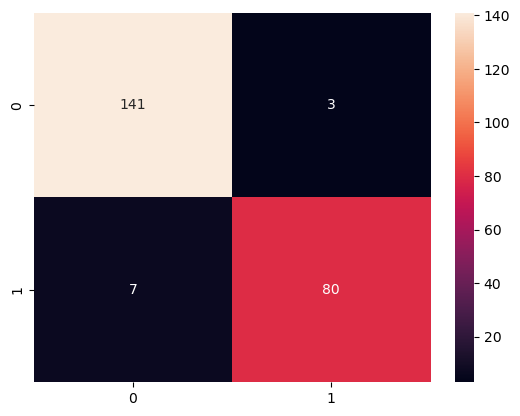

In [132]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt="d")
cm=confusion_matrix(y_test,rf_pred)

In [133]:
from sklearn.metrics import confusion_matrix,classification_report
print('TN - true negative {}'.format(cm[0,0]))
print('FP - false positive {}'.format(cm[0,1]))
print('FN - false negative {}'.format(cm[1,0]))
print('TP - true positive {}'.format(cm[1,1]))
print('accuracy rate of naive bayes: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('misclassification rate of naive bayes: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - true negative 141
FP - false positive 3
FN - false negative 7
TP - true positive 80
accuracy rate of naive bayes: 95.67099567099568
misclassification rate of naive bayes: 4.329004329004329


In [134]:
print("train accuracy of random forest",rf_model.score(x_train,y_train)*100)
print("accuracy test score of random forest",rf_model.score(x_test,y_test)*100)
print("accuracy score of random forest",accuracy_score(y_test,rf_pred)*100)

train accuracy of random forest 94.22718808193669
accuracy test score of random forest 95.67099567099568
accuracy score of random forest 95.67099567099568


In [135]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
auc= roc_auc_score(y_test,rf_pred)
print('roc_auc_score of RF:',auc)

roc_auc_score of RF: 0.949353448275862


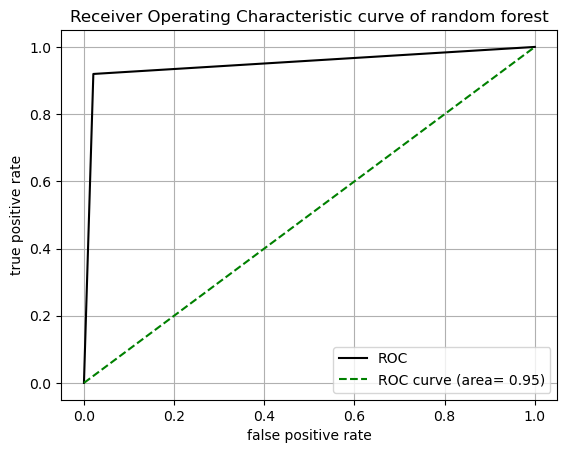

In [136]:
fpr,tpr,thresholds=roc_curve(y_test,rf_pred)
plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1],[0,1], color='green',linestyle='--',label='ROC curve (area= %0.2f)' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic curve of random forest")
plt.legend()
plt.grid()
plt.show()

# Naive Bayes Classifier algorithm

In [137]:
from sklearn.naive_bayes import GaussianNB

In [138]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

# Confusion Matrix 

In [139]:
x_train

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
491            2       89             90             30   79.799479  33.5   
69             4      146             85             27  100.000000  28.9   
667           10      111             70             27   79.799479  27.5   
566            1       99             72             30   18.000000  38.6   
97             1       71             48             18   76.000000  20.4   
..           ...      ...            ...            ...         ...   ...   
369            1      133            102             28  140.000000  32.8   
320            4      129             60             12  231.000000  27.5   
527            3      116             74             15  105.000000  26.3   
125            1       88             30             42   99.000000  55.0   
265            5       96             74             18   67.000000  33.6   

     DiabetesPedigreeFunction  Age  
491                     0.292   42  
69                      0.189   27  
667                     0.141   40  
566                     0.412   21  
97                      0.323   22  
..                        ...  ...  
369                     0.234   45  
320                     0.527   31  
527                     0.107   24  
125                     0.496   26  
265                     0.997   43  

[537 rows x 8 columns]

In [140]:
y_train

491    0
69     0
667    1
566    0
97     0
      ..
369    1
320    0
527    0
125    1
265    0
Name: Outcome, Length: 537, dtype: int64

In [141]:
x_test

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
568            4      154             72             29  126.000000  31.3   
620            2      112             86             42  160.000000  38.4   
456            1      135             54              0   79.799479  26.7   
197            3      107             62             13   48.000000  22.9   
714            3      102             74              0   79.799479  29.5   
..           ...      ...            ...            ...         ...   ...   
345            8      126             88             36  108.000000  38.5   
408            8      197             74              0   79.799479  25.9   
304            3      150             76              0   79.799479  21.0   
686            3      130             64              0   79.799479  23.1   
202            0      108             68             20   79.799479  27.3   

     DiabetesPedigreeFunction  Age  
568                     0.338   37  
620                     0.246   28  
456                     0.687   62  
197                     0.678   23  
714                     0.121   32  
..                        ...  ...  
345                     0.349   49  
408                     1.191   39  
304                     0.207   37  
686                     0.314   22  
202                     0.787   32  

[231 rows x 8 columns]

In [142]:
y_test

568    0
620    0
456    0
197    1
714    0
      ..
345    0
408    1
304    0
686    0
202    0
Name: Outcome, Length: 231, dtype: int64

In [143]:
nb_pred=nb.predict(x_test)

In [144]:
nb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)

<AxesSubplot:>

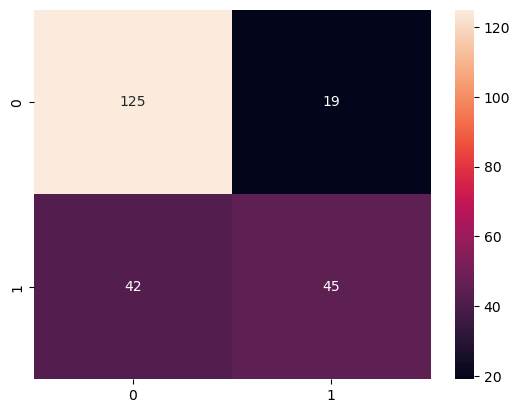

In [145]:
cm=confusion_matrix(y_test,nb_pred)
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True,fmt='d')

In [146]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
print('TN - true negative {}'.format(cm[0,0]))
print('FP - false positive {}'.format(cm[0,1]))
print('FN - false negative {}'.format(cm[1,0]))
print('TP - true positive {}'.format(cm[1,1]))
print('accuracy rate of naive bayes: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))*100))
print('misclassification rate of naive bayes: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))

TN - true negative 125
FP - false positive 19
FN - false negative 42
TP - true positive 45
accuracy rate of naive bayes: 73.59307359307358
misclassification rate of naive bayes: 26.406926406926406


In [147]:
print("train accuracy of naive bayes",nb.score(x_train,y_train)*100)
print("accuracy test score of naive bayes",nb.score(x_test,y_test)*100)
print("accuracy score of naive bayes",accuracy_score(y_test,nb_pred)*100)

train accuracy of naive bayes 76.35009310986965
accuracy test score of naive bayes 73.59307359307358
accuracy score of naive bayes 73.59307359307358


In [148]:
print("classification report of naive bayes: \n" ,classification_report(y_test,nb_pred,digits=4))

classification report of naive bayes: 
               precision    recall  f1-score   support

           0     0.7485    0.8681    0.8039       144
           1     0.7031    0.5172    0.5960        87

    accuracy                         0.7359       231
   macro avg     0.7258    0.6926    0.6999       231
weighted avg     0.7314    0.7359    0.7256       231



In [149]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
auc= roc_auc_score(y_test,nb_pred)
print('roc_auc_score of NB:',auc)

roc_auc_score of NB: 0.6926484674329502


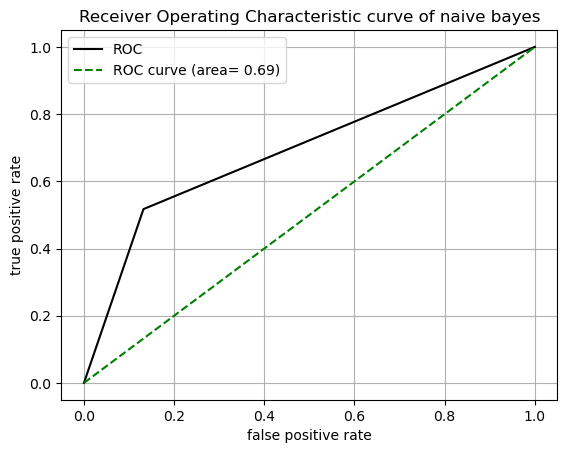

In [150]:
fpr,tpr,thresholds=roc_curve(y_test,nb_pred)
plt.plot(fpr, tpr, color='black', label='ROC')
plt.plot([0,1],[0,1], color='green',linestyle='--',label='ROC curve (area= %0.2f)' % auc)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("Receiver Operating Characteristic curve of naive bayes")
plt.legend()
plt.grid()
plt.show()

# machine learning algorithms                                          accuracy score

# SVM                                                                               78%
# LOGISTIC REGRESSION                                             83%
# KNN                                                                               75%
# DECISION TREE                                                           94%
# RANDOM FOREST                                                       95%
# NAIVE BAYES                                                               76%

# predicting whether  the patient  is diabetes or not

In [151]:
input_data=[6,148,72,35,0,33.6,0.627,50]
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1) 
print(input_data_reshaped)
standardized_data = scaler.transform(input_data_reshaped)
print(standardized_data)
prediction = classifier.predict(standardized_data)
print(prediction)
if (prediction [0]== 0): 
  print("the person is not diabetic")
else:
  print("the person is diabetic")

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -1.27564498  0.20401277
   0.46849198  1.4259954 ]]
[1]
the person is diabetic


In [153]:
new_data_point = np.array([1,85,66,29,0,26.6,0.351,31]).reshape(1, -1)

# Standardize the new data point
new_data_point_standardized = scaler.transform(new_data_point)

# Make a prediction
prediction = classifier.predict(new_data_point_standardized)

# Output the prediction
if prediction[0] == 0:
    print("The person is not diabetic.")
else:
    print("The person is diabetic.")

The person is not diabetic.
